In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
# for calculating mean_squared error
from sklearn.metrics import mean_squared_error
# Importing Linear Regression 
from sklearn.linear_model import LinearRegression
# Importing ridge
from sklearn.linear_model import Ridge
# for polynomial regression
# importing libraries for polynomial transform
from sklearn.preprocessing import PolynomialFeatures

**For Both cases (Heteroscedastic & Monotonic)<br> Implement a polynomial regression on the data of degree 3 and 4 without regularization.<br>
What do you notice? <br>
Show that overfitting exists.<br> 
Try reducing the overfitting. Show that the overfitting decreased**

# Heteroscedastic

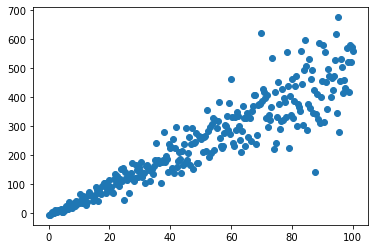

In [2]:
hetero=pd.read_csv('heteroscedastic.csv')
plt.scatter(hetero['x'],hetero['y'])
plt.show()

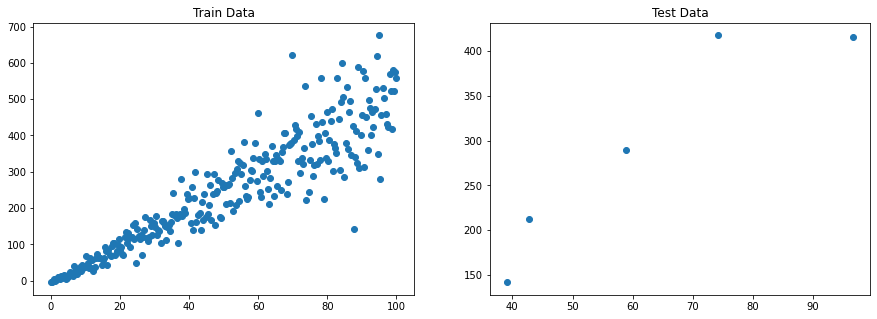

In [3]:
# Here i will use some data points from test data
#nmber of samples needed
n = 5
r = hetero.shape[0]
ratio = n / r
train, test = train_test_split(hetero, test_size=ratio,random_state=28)

fig, ax = plt.subplots(1,2, figsize=(15, 5))
ax[0].scatter(train['x'],train['y'])
ax[0].set_title("Train Data")

ax[1].scatter(test['x'],test['y'])
ax[1].set_title("Test Data")
plt.show()

# Polynomial Function

In [4]:
#create a function for the polynomial regression
def model_poly(data,degree,lr):
    x = data.iloc[:,0:1].values
    y = data.iloc[:,1:].values
    P = PolynomialFeatures(degree=degree)
    x_P = P.fit_transform(x)
    lr.fit(x_P,y) 
    x_range = np.linspace(x.min(), x.max())
    x_val = P.fit_transform(x_range.reshape(-1,1))
    y_range_lr = lr.intercept_ + np.sum(lr.coef_ * x_val, axis = 1)
    y_pred = lr.predict(x_P)
    
    
    return x,y,x_range,y_range_lr, y_pred,x_P,x_val




# Ridge Function

In [5]:
#Create an L2 regularization function (Ridge)
def model_ridge(x_P,y,x_val):
    #Apply L2 regularization Ridge with lambda = 0.3
    ridge = Ridge(0.3)
    ridge.fit(x_P,y)
    
    y_range_ridge = ridge.intercept_ + np.sum(ridge.coef_ * x_val, axis = 1)
    y_pred_ridge = ridge.predict(x_P)
    
    
    return y_range_ridge, y_pred_ridge


In [6]:
# Using our two functions and compare results
degree = 4 # Here i used degree 4 because of using only 5 points sample
lr = LinearRegression()
x,y,x_range,y_range_lr, y_pred,x_P,x_val = model_poly(test, degree, lr)

y_range_ridge, y_pred_ridge = model_ridge(x_P, y, x_val)

# calculate the RMSE as the indication of overfitting
print('RMSE for Polynomial Regression=>',np.sqrt(mean_squared_error(y,y_pred)))
print('RMSE for Ridge Regression=>',np.sqrt(mean_squared_error(y,y_pred_ridge)))


RMSE for Polynomial Regression=> 2.744960312187376e-07
RMSE for Ridge Regression=> 16.55883249570606


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.85333e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Here we notice that there is overfitting before applying regularization. After applying ridge, we notice that the overfitting is redused. 

# Plotting

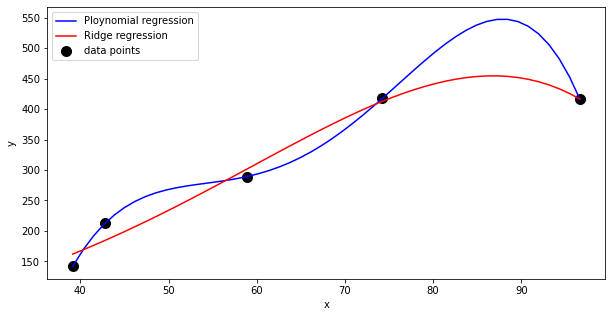

In [7]:
#Plotting
plt.figure(figsize=(10,5))
plt.plot(x_range,y_range_lr,c='blue', label='Ploynomial regression')
plt.plot(x_range,y_range_ridge,c='red', label='Ridge regression')
plt.scatter(x,y,s=100,c='black', label='data points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Monotonic

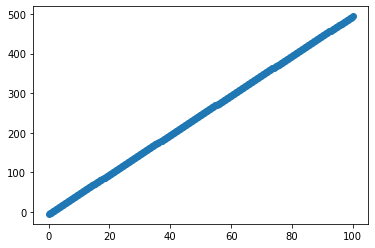

In [8]:
monotonic=pd.read_csv('monotonic.csv')
plt.scatter(monotonic['x'],monotonic['y'])
plt.show()

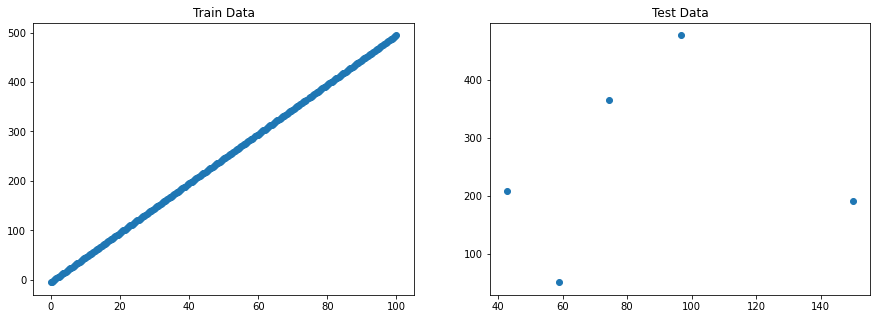

In [9]:
# Here i will use some data points from test data
#nmber of samples needed
n = 5
r = monotonic.shape[0]
ratio = n / r
train, test = train_test_split(monotonic, test_size=ratio,random_state=28)
# Because this data is monotonic, we could not notice any difference so i will change 2 points value to make the data random
# enough to work on it
# first conver pd dataframe to np array
s = np.array(test)
# change values
s[2][1]=50
s[3][0]= 150
# back to pd dataframe
test = pd.DataFrame(s, columns = ['x','y'])
fig, ax = plt.subplots(1,2, figsize=(15, 5))
ax[0].scatter(train['x'],train['y'])
ax[0].set_title("Train Data")

ax[1].scatter(test['x'],test['y'])
ax[1].set_title("Test Data")
plt.show()

In [10]:
# Using our two functions and compare results
degree = 4 # Here i used degree 4 because of using only 5 points sample
lr = LinearRegression()
x,y,x_range,y_range_lr, y_pred,x_P,x_val = model_poly(test, degree, lr)

y_range_ridge, y_pred_ridge = model_ridge(x_P, y, x_val)

# calculate the RMSE as the indication of overfitting
print('RMSE for Polynomial Regression=>',np.sqrt(mean_squared_error(y,y_pred)))
print('RMSE for Ridge Regression=>',np.sqrt(mean_squared_error(y,y_pred_ridge)))


RMSE for Polynomial Regression=> 1.1735882132152433e-05
RMSE for Ridge Regression=> 61.755742053846284


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.62669e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Here we notice that there is overfitting before applying regularization. After applying ridge, we notice that the overfitting is redused.

# Plotting

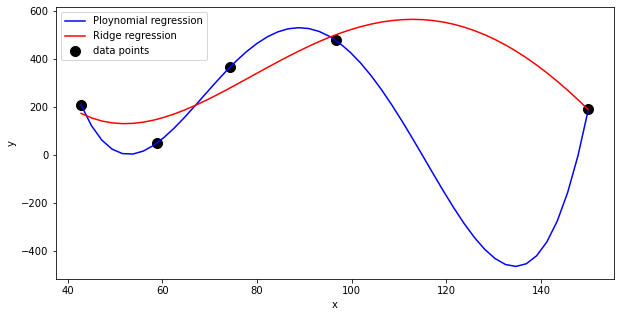

In [11]:
#Plotting
plt.figure(figsize=(10,5))
plt.plot(x_range,y_range_lr,c='blue', label='Ploynomial regression')
plt.plot(x_range,y_range_ridge,c='red', label='Ridge regression')
plt.scatter(x,y,s=100,c='black', label='data points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()